# Partie 1 & 2 - Exploration des données

## Import des librairies

In [1]:
import json
import pandas as pd
import matplotlib as plt

## Partie 1 - Chargement des données
### Fichiers de références :
- prepare_data/data_loader.py

### Chargement des données
- Format de données : coco.json
-> Appel de la fonction load_coco_json contenu dans le module data_loader.py
- Adapte le chemin du fichier coco.json par rapport à ton espace de travail

In [2]:
from data_loader import load_coco_json

coco_data = load_coco_json('/home/gaetansimplon/wildfire_detection/data/_annotations.coco.json')


# Affichage des clés
print(coco_data.keys())

# Affichage 1ère image
display('Image 1 :', coco_data['images'][:1])
# Affichage 1ère annotation
display('Annotation 1 :', coco_data['annotations'][:1])
# Affichage catégories
display('Catégories : ', coco_data['categories'])


dict_keys(['info', 'licenses', 'categories', 'images', 'annotations'])


'Image 1 :'

[{'id': 0,
  'license': 1,
  'file_name': 'cl6e1qges001kgk555z158f33_2_FALSE_COLOR_jpg.rf.479904c9e54c6ba121689341598bf3ed.jpg',
  'height': 860,
  'width': 1200,
  'date_captured': '2025-09-14T12:06:19+00:00',
  'extra': {'name': 'cl6e1qges001kgk555z158f33_2_FALSE_COLOR.jpg'}}]

'Annotation 1 :'

[{'id': 0,
  'image_id': 1,
  'category_id': 1,
  'bbox': [277, 207, 568.95, 591.79],
  'area': 336698.921,
  'segmentation': [],
  'iscrowd': 0}]

'Catégories : '

[{'id': 0, 'name': 'wildfire', 'supercategory': 'none'},
 {'id': 1, 'name': 'fire', 'supercategory': 'wildfire'}]

In [3]:
# Vérification des catégories
categories = pd.DataFrame(coco_data['categories'])
display(categories)
# 0 = wildfire / 1 = Fire

# Dénombrement du nombre d'annotations avec comme catégorie wildfire
annotations = pd.DataFrame(coco_data['annotations'])
display(annotations['category_id'].unique())
# Il n'y a aucune annotation avec la catégorie wildfire.


,id,name,supercategory
0,0,wildfire,none
1,1,fire,wildfire


array([1])

### Mise en Dataframe
Etapes :
- Mettre en dataframe chaque liste du json en dataframes distincts ('images', 'annotations' et 'categories)
- Fusionner les annotations avec les informations des images
- Ajouter le nom de la catégories à chaque annotations

Données filtrées :
- id_ann -> id de l'annotation
- image_id -> id de l'image correspondante
- category_id -> id de la catégorie
- bbox -> coordonnées de la boîte englobante [x, y, largeur (width), hauteur(height)]
- area -> Surface de l'objet annoté en pixel (width*height)
- segmentation -> Liste de points décrivant la forme exacte de l'objet
- iscrowd -> Indique si l'objet fait partie d'un groupe dense (=1) ou isolé (=0)
- file_name -> nom du fichier image
- width / height -> Dimension de l'image en pixel
- id -> Indentifiant interne au dataframe
- category_name -> nom de la catégorie (ex: feu)



In [4]:
from data_loader import coco_to_df

df = coco_to_df(coco_data)
display(type(df))
display(df.head())
display(df.columns)

pandas.core.frame.DataFrame

,id_ann,image_id,bbox,area,segmentation,iscrowd,file_name,width,height,id,category_name
0,0,1,"[277, 207, 568.95, 591.79]",336698.921,[],0,cl6kgm9qr002yc455g5qs87kz_2_FALSE_COLOR_jpg.rf...,1200,860,1,fire
1,1,2,"[800, 0, 157.45, 413.38]",65086.681,[],0,cl6odzs5e002oao55heuig0a6_1_TRUE_COLOR_jpg.rf....,1200,860,1,fire
2,2,2,"[1062, 96, 58.37, 63.91]",3730.427,[],0,cl6odzs5e002oao55heuig0a6_1_TRUE_COLOR_jpg.rf....,1200,860,1,fire
3,3,2,"[452, 442, 410.09, 350.6]",143777.554,[],0,cl6odzs5e002oao55heuig0a6_1_TRUE_COLOR_jpg.rf....,1200,860,1,fire
4,4,2,"[0, 163, 336.16, 375.08]",126086.893,[],0,cl6odzs5e002oao55heuig0a6_1_TRUE_COLOR_jpg.rf....,1200,860,1,fire


Index(['id_ann', 'image_id', 'bbox', 'area', 'segmentation', 'iscrowd',
       'file_name', 'width', 'height', 'id', 'category_name'],
      dtype='object')

## Partie 2 - Exploration & nettoyage des données


### A. Explorer les données pour en extraire les informations suivantes
- Nombre total d'image
- Nombre total d'annotations
- Quelles sont les catégories ?
- Nombre d'image par catégories
- Statistiques sur le nombre d'annotation par image
=> Ajouter 4 fonctions d'explorations dans le fichier prepare_data/data_explorer.py

In [ ]:
from data_explorer import dataset_summary, ann_per_img, plot_ann_per_image

# Résumé des données
display(dataset_summary(df))

# Nombre total d'images
sum_img = df['image_id'].nunique()
display('Nombre total images :', sum_img)

# Nombre total d'annotations
sum_ann = df['id_ann'].nunique()
display('Nombre total annotations : ', sum_ann)

# Noms des catégories et décompte du nombre d'annotations
category_names = df['category_name'].nunique()
display('Catégories dénombrées: ', category_names)

# Nombre d'images par catégorie

nb_img_per_cat = df.groupby('category_name')['image_id'].nunique()
display("Nombre d'images par catégorie", nb_img_per_cat)

# Nombre d'annotations par image

nb_ann_per_img = df.groupby('image_id')['id_ann'].nunique()
display("Nombre d'annotations par image : ", nb_ann_per_img)



Colonnes disponibles : ['id_ann', 'image_id', 'bbox', 'area', 'segmentation', 'iscrowd', 'file_name', 'width', 'height', 'id', 'category_name']
Nombre total d’images : 493
Nombre total d’annotations : 959
Nombre moyen d’annotations par image : 1.95


None

'Nombre total images :'

493

'Nombre total annotations : '

959

'Catégories dénombrées: '

1

"Nombre d'images par catégorie"

category_name
fire    493
Name: image_id, dtype: int64

"Nombre d'annotations par image : "

image_id
1      1
2      4
3      1
4      1
5      2
      ..
495    1
496    3
497    1
498    1
499    1
Name: id_ann, Length: 493, dtype: int64

In [9]:
# Nombre moyen d'annotation par image

display(ann_per_img(df))

# Nombre d'images sans annotations



Statistiques des annotations par image : 
count    493.000000
mean       1.945233
std        1.405218
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       10.000000
dtype: float64


None

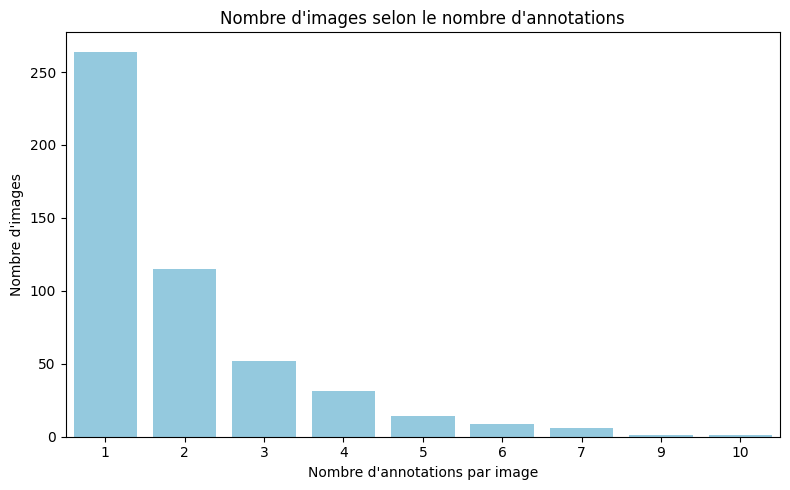

In [7]:
# Graphique du nombre d'annotations par image

plot_ann_per_image(df)

## Vérification incohérences des données

- Ecrire une fonction qui renvoie les extensions des fichiers
- Ecrire une fonction qui vérifie la cohérence entre les images disponibles et les images présentes dans _annotations.coco.json
- Écrire une fonction qui renvoie la liste des images sans annotations s’il y en a
- Créer une liste d’id unique dans les annotations (pandas unique)
- Filtrer le dataframe d’images en ne gardant que les images telles que l’id ne soient pas dans la liste d’id unique (exemple pandas)
- Écrire une fonction qui renvoie les annotations ne correspondant à aucune image
- Ecrire une fonction qui détecte les valeurs aberrantes pour les annotations (ex : hauteur == 0 et largeur != 0, etc)




In [ ]:
# Fonction qui renvoie les extensions des fichiers
from pathlib import Path

dir_path = "/home/fadilatou/PROJETS/wildfire_detection/data/satellite wildfire detection/_annotations.coco.json"
# Create a path object
dir_path = Path(dir_path)
# Find all text files inside a directory
files = list(dir_path.glob("*.png , *.jpg"))

print(files)

[]


In [ ]:
# Vérification de la cohérence entre images disponibles et les images présent dans l'annotations
def coherence_images(image_dir, coco_data):
    """
    Vérifie la cohérence entre les images du dossier et celles listées dans le fichier COCO.
    Retourne les images manquantes et les images en trop.
    """
    from pathlib import Path
    # Liste des fichiers images dans le dossier
    image_files = set([f.name for f in Path(image_dir).glob("*.png")])
    # Liste des fichiers attendus dans le COCO json
    coco_images = set([img['file_name'] for img in coco_data['images']])

    manquant = coco_images - image_files
    extra = image_files - coco_images
    return {"missing_in_folder": list(manquant), "extra_in_folder": list(extra)}


In [ ]:
# Les images sans annotations

def images_sans_annotations(df):
    """
    Retourne la liste des images sans annotations dans le DataFrame.
    """
    images_avec_annotations = set(df['image_id'].unique())
    toutes_images = set(df['file_name'].unique())
    # On suppose que chaque ligne du df correspond à une annotation
    # Si une image n'a aucune annotation, elle n'apparaît pas dans df['image_id']
    # Pour être plus précis, il faut avoir le DataFrame des images (images_df)
    # Exemple avec images_df :
    # images_sans_annotations = set(images_df['file_name']) - set(df['file_name'])
    # Mais avec df seul :
    return list(toutes_images - set(df['file_name']))
